# Week 1: Basic Circuit Components

## Topics Covered:
- Basic Circuit
- Voltage and Current
- Wire Gauge and Amperage
- DC Power Source
- AC Power Source
- Volt Meter
- Resistors
- Switches and Breakers

---

## Setup: Install Required Libraries

We'll use Python libraries to simulate and visualize electronic circuits.

In [1]:
!pip install matplotlib numpy scipy schemdraw -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.9/136.9 kB 2.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import schemdraw
import schemdraw.elements as elm
from scipy import signal

# Set up plotting style
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 1. Basic Circuit

A basic circuit consists of:
- **Power Source** (Battery or Supply)
- **Load** (Resistor, LED, etc.)
- **Conductors** (Wires)
- **Control** (Switch)

### Drawing a Simple Circuit

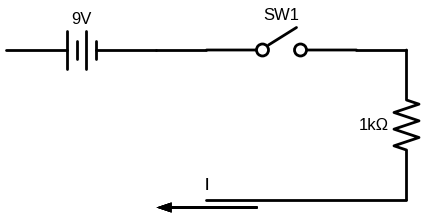

In [3]:
# Draw a simple circuit with battery, switch, and resistor
with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    d += elm.Battery().label('9V')
    d += elm.Line().right(1)
    d += elm.Switch().label('SW1')
    d += elm.Line().right(1)
    d += elm.Resistor().down().label('1kΩ')
    d += elm.Line().left(4)
    d += elm.CurrentLabel().at(d.here).label('I')

## 2. Voltage and Current

### Key Concepts:

**Voltage (V)**:
- Electrical potential difference
- Measured in Volts (V)
- Analogy: Water pressure in a pipe

**Current (I)**:
- Flow of electric charge
- Measured in Amperes (A)
- Analogy: Water flow rate

**Resistance (R)**:
- Opposition to current flow
- Measured in Ohms (Ω)
- Analogy: Pipe diameter restriction

### Relationship: Ohm's Law
$$V = I \times R$$

In [12]:
# Interactive Ohm's Law Calculator
def ohms_law_calculator(V=None, I=None, R=None):
    """
    Calculate the missing value using Ohm's Law: V = I × R
    Provide any two values to calculate the third
    """
    if V is None:
        V = I * R
        print(f"Voltage (V) = {V:.3f} Volts")
    elif I is None:
        I = V / R
        print(f"Current (I) = {I:.6f} Amperes ({I*1000:.3f} mA)")
    elif R is None:
        R = V / I
        print(f"Resistance (R) = {R:.3f} Ohms")

    return {'V': V, 'I': I, 'R': R}

# Example calculations
print("Example 1: Find Current given V=9V and R=1000Ω")
result1 = ohms_law_calculator(V=9, R=1000)  # 9V battery, 1kΩ resistor

print("\nExample 2: Find Resistance given V=5V and I=0.02A")
result2 = ohms_law_calculator(V=5, I=0.02)  # 5V, 20mA

print("\nExample 3: Find Voltage given I=0.001A and R=10000Ω")
result3 = ohms_law_calculator(I=0.001, R=10000)  # 1mA, 10kΩ

Example 1: Find Current given V=9V and R=1000Ω
Current (I) = 0.009000 Amperes (9.000 mA)

Example 2: Find Resistance given V=5V and I=0.02A
Resistance (R) = 250.000 Ohms

Example 3: Find Voltage given I=0.001A and R=10000Ω
Voltage (V) = 10.000 Volts


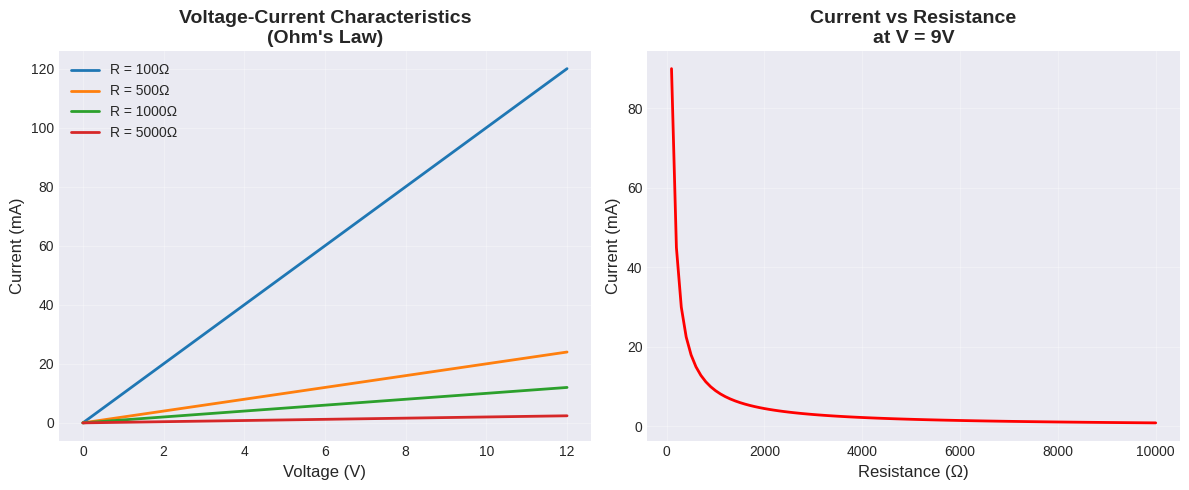

In [6]:
# Visualize Ohm's Law: V-I Characteristics
resistances = [100, 500, 1000, 5000]  # Different resistance values
voltage = np.linspace(0, 12, 100)  # Voltage from 0 to 12V

plt.figure(figsize=(12, 5))

# Plot 1: V-I Curves for different resistors
plt.subplot(1, 2, 1)
for R in resistances:
    current = voltage / R * 1000  # Convert to mA
    plt.plot(voltage, current, label=f'R = {R}Ω', linewidth=2)

plt.xlabel('Voltage (V)', fontsize=12)
plt.ylabel('Current (mA)', fontsize=12)
plt.title('Voltage-Current Characteristics\n(Ohm\'s Law)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Current vs Resistance at fixed voltage
plt.subplot(1, 2, 2)
R_values = np.linspace(100, 10000, 100)
V_fixed = 9  # 9V battery
I_values = V_fixed / R_values * 1000  # mA

plt.plot(R_values, I_values, 'r-', linewidth=2)
plt.xlabel('Resistance (Ω)', fontsize=12)
plt.ylabel('Current (mA)', fontsize=12)
plt.title(f'Current vs Resistance\nat V = {V_fixed}V', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Wire Gauge and Amperage

### American Wire Gauge (AWG)

Wire gauge determines current carrying capacity:
- **Lower AWG number** = Thicker wire = More current capacity
- **Higher AWG number** = Thinner wire = Less current capacity

### Common Wire Gauges:

Wire Gauge Reference Table:
 AWG  Diameter (mm)  Max Current (A)                    Typical Use
   6          4.115             60.0 Main feeders, heavy industrial
   8          3.264             40.0    Large appliances, subpanels
  10          2.588             30.0               Heavy appliances
  12          2.053             20.0             Household circuits
  14          1.628             15.0                 Light circuits
  16          1.291             10.0                Extension cords
  18          1.024              7.0           Low-voltage fixtures
  20          0.812              5.0                    Electronics
  22          0.644              3.0             Breadboard jumpers
  24          0.511              2.0                     PCB traces
  26          0.405              1.4              Small electronics
  28          0.321              1.0                  Wire-wrapping
  30          0.255              0.5               Fine electronics


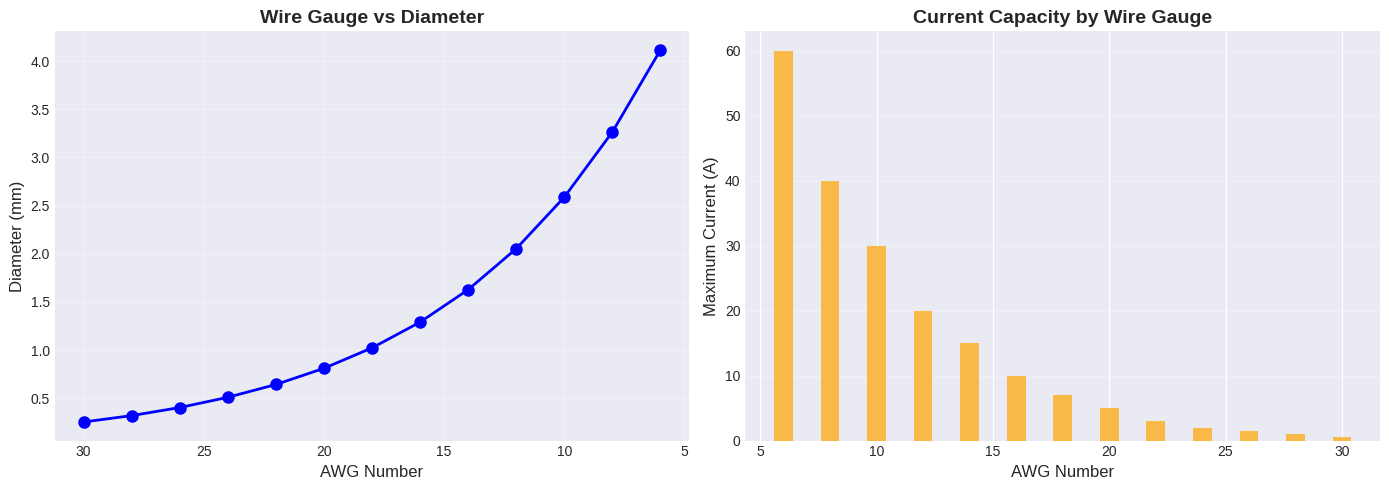

In [11]:
import pandas as pd

# Wire gauge reference table
wire_data = {
    'AWG': [6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
    'Diameter (mm)': [4.115, 3.264, 2.588, 2.053, 1.628, 1.291, 1.024, 0.812, 0.644, 0.511, 0.405, 0.321, 0.255],
    'Max Current (A)': [60, 40, 30, 20, 15, 10, 7, 5, 3, 2, 1.4, 1, 0.5],
    'Typical Use': [
        'Main feeders, heavy industrial',
        'Large appliances, subpanels',
        'Heavy appliances',
        'Household circuits',
        'Light circuits',
        'Extension cords',
        'Low-voltage fixtures',
        'Electronics',
        'Breadboard jumpers',
        'PCB traces',
        'Small electronics',
        'Wire-wrapping',
        'Fine electronics'
    ]
}

df_wire = pd.DataFrame(wire_data)
print("Wire Gauge Reference Table:")
print(df_wire.to_string(index=False))

# Visualize wire gauge
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Diameter vs AWG
ax1.plot(df_wire['AWG'], df_wire['Diameter (mm)'], 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('AWG Number', fontsize=12)
ax1.set_ylabel('Diameter (mm)', fontsize=12)
ax1.set_title('Wire Gauge vs Diameter', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.invert_xaxis()  # Larger AWG on left

# Plot 2: Current capacity vs AWG
ax2.bar(df_wire['AWG'], df_wire['Max Current (A)'], color='orange', alpha=0.7)
ax2.set_xlabel('AWG Number', fontsize=12)
ax2.set_ylabel('Maximum Current (A)', fontsize=12)
ax2.set_title('Current Capacity by Wire Gauge', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 4. DC Power Source

**Direct Current (DC)**: Current flows in one direction

### Common DC Sources:
- Batteries (AA, AAA, 9V, coin cells)
- USB power (5V)
- Solar panels
- DC power adapters
- Phone chargers

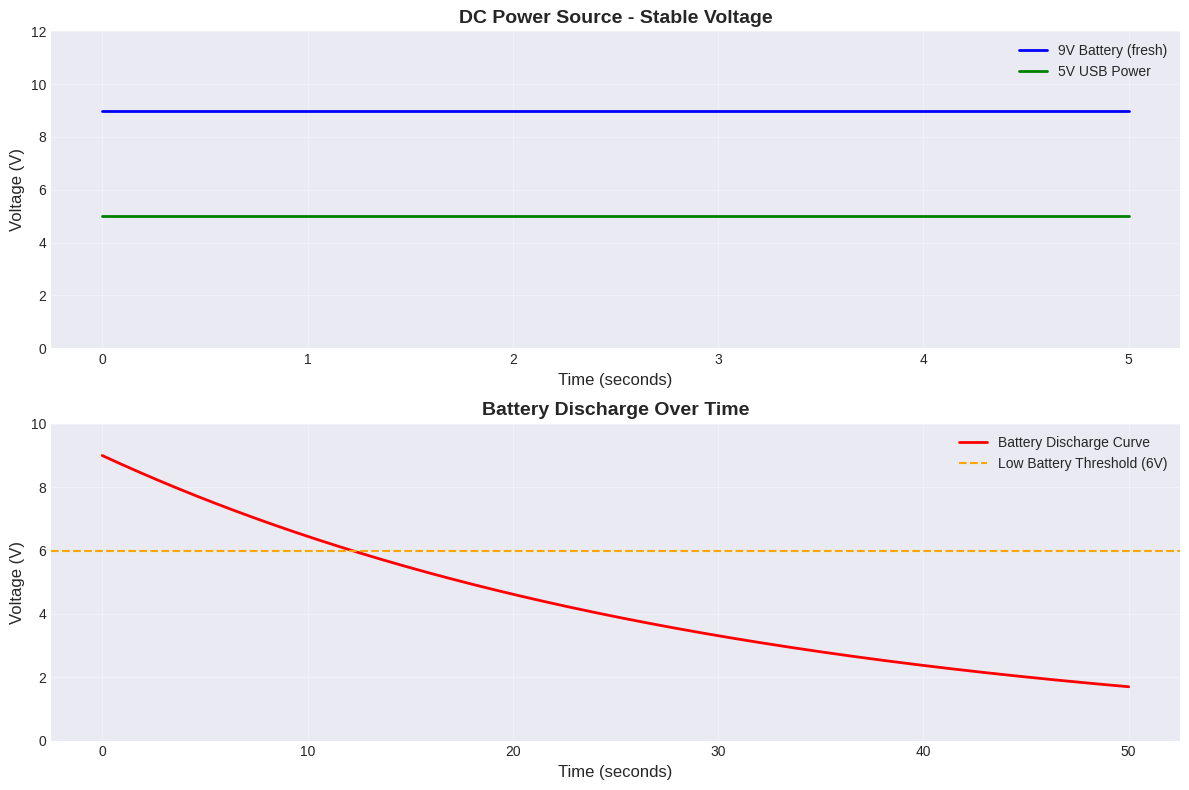

In [8]:
# Simulate DC voltage over time
time = np.linspace(0, 5, 1000)  # 5 seconds
dc_voltage_9v = np.ones_like(time) * 9  # Constant 9V
dc_voltage_5v = np.ones_like(time) * 5  # Constant 5V

# Simulate battery discharge
battery_fresh = 9 * np.ones_like(time)
battery_discharged = 9 * np.exp(-time/10)  # Exponential decay

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot 1: Stable DC voltage
ax1.plot(time, dc_voltage_9v, 'b-', linewidth=2, label='9V Battery (fresh)')
ax1.plot(time, dc_voltage_5v, 'g-', linewidth=2, label='5V USB Power')
ax1.set_xlabel('Time (seconds)', fontsize=12)
ax1.set_ylabel('Voltage (V)', fontsize=12)
ax1.set_title('DC Power Source - Stable Voltage', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 12)

# Plot 2: Battery discharge
time_long = np.linspace(0, 50, 1000)  # 50 seconds
battery_discharge = 9 * np.exp(-time_long/30)
ax2.plot(time_long, battery_discharge, 'r-', linewidth=2, label='Battery Discharge Curve')
ax2.axhline(y=6, color='orange', linestyle='--', label='Low Battery Threshold (6V)')
ax2.set_xlabel('Time (seconds)', fontsize=12)
ax2.set_ylabel('Voltage (V)', fontsize=12)
ax2.set_title('Battery Discharge Over Time', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 10)

plt.tight_layout()
plt.show()

## 5. AC Power Source

**Alternating Current (AC)**: Current periodically reverses direction

### Key Parameters:
- **Frequency**: How fast it alternates (50/60 Hz for mains power)
- **Amplitude**: Peak voltage
- **RMS Voltage**: Effective voltage (Vrms = Vpeak / √2)

### Common AC Sources:
- Wall outlets (120V/60Hz in US, 230V/50Hz in Europe)
- Generators
- Function generators

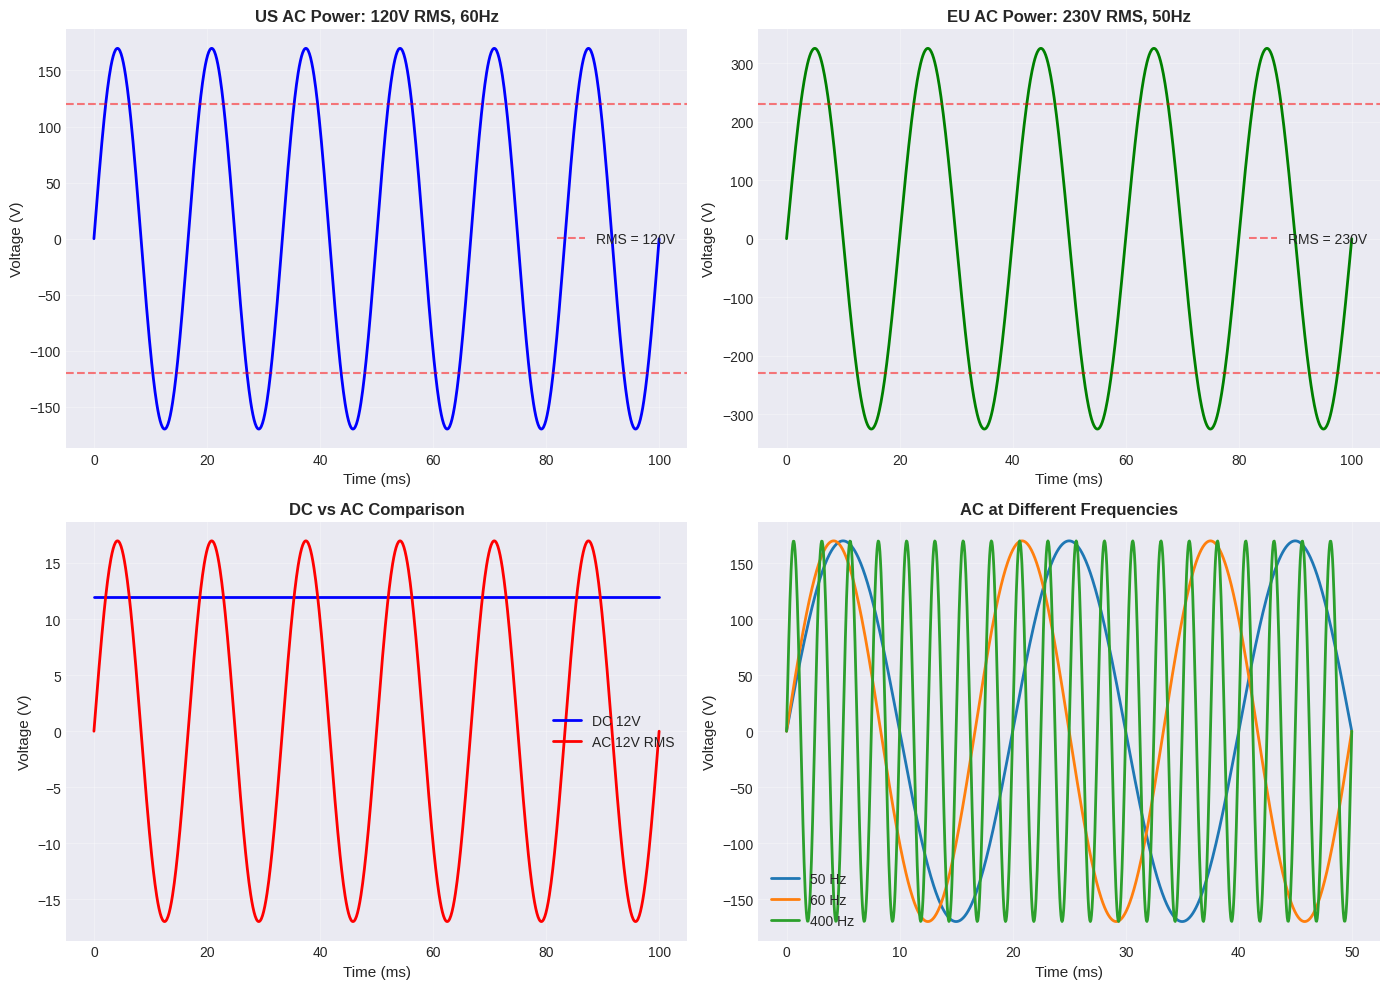

In [9]:
# Simulate AC waveforms
time = np.linspace(0, 0.1, 1000)  # 100ms
frequency_60Hz = 60  # US standard
frequency_50Hz = 50  # European standard

# AC voltages
V_peak_us = 120 * np.sqrt(2)  # 120V RMS -> Peak
V_peak_eu = 230 * np.sqrt(2)  # 230V RMS -> Peak

ac_us = V_peak_us * np.sin(2 * np.pi * frequency_60Hz * time)
ac_eu = V_peak_eu * np.sin(2 * np.pi * frequency_50Hz * time)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: US AC (120V, 60Hz)
axes[0, 0].plot(time * 1000, ac_us, 'b-', linewidth=2)
axes[0, 0].axhline(y=120, color='r', linestyle='--', alpha=0.5, label='RMS = 120V')
axes[0, 0].axhline(y=-120, color='r', linestyle='--', alpha=0.5)
axes[0, 0].set_xlabel('Time (ms)', fontsize=11)
axes[0, 0].set_ylabel('Voltage (V)', fontsize=11)
axes[0, 0].set_title('US AC Power: 120V RMS, 60Hz', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: European AC (230V, 50Hz)
axes[0, 1].plot(time * 1000, ac_eu, 'g-', linewidth=2)
axes[0, 1].axhline(y=230, color='r', linestyle='--', alpha=0.5, label='RMS = 230V')
axes[0, 1].axhline(y=-230, color='r', linestyle='--', alpha=0.5)
axes[0, 1].set_xlabel('Time (ms)', fontsize=11)
axes[0, 1].set_ylabel('Voltage (V)', fontsize=11)
axes[0, 1].set_title('EU AC Power: 230V RMS, 50Hz', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: DC vs AC comparison
dc_voltage = np.ones_like(time) * 12
ac_12v = 12 * np.sqrt(2) * np.sin(2 * np.pi * 60 * time)
axes[1, 0].plot(time * 1000, dc_voltage, 'b-', linewidth=2, label='DC 12V')
axes[1, 0].plot(time * 1000, ac_12v, 'r-', linewidth=2, label='AC 12V RMS')
axes[1, 0].set_xlabel('Time (ms)', fontsize=11)
axes[1, 0].set_ylabel('Voltage (V)', fontsize=11)
axes[1, 0].set_title('DC vs AC Comparison', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Different AC frequencies
time_freq = np.linspace(0, 0.05, 1000)
for freq in [50, 60, 400]:
    ac_wave = 170 * np.sin(2 * np.pi * freq * time_freq)
    axes[1, 1].plot(time_freq * 1000, ac_wave, linewidth=2, label=f'{freq} Hz')
axes[1, 1].set_xlabel('Time (ms)', fontsize=11)
axes[1, 1].set_ylabel('Voltage (V)', fontsize=11)
axes[1, 1].set_title('AC at Different Frequencies', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Voltmeter

A voltmeter measures the potential difference between two points.

### Key Points:
- Connected in **parallel** with the component
- High internal resistance (ideally infinite)
- Displays voltage in Volts (V)

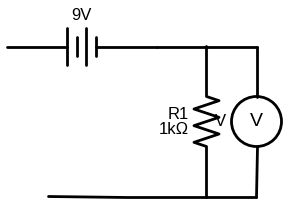

In [13]:
# Draw circuit with voltmeter
with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    d += elm.Battery().label('9V')
    # Save the starting point for the top wire of the main circuit
    main_circuit_start = d.here

    d += elm.Line().right(1)
    resistor_top_node = d.here # This is the point before the resistor

    d += elm.Resistor().down().label('R1\n1kΩ')
    resistor_bottom_node = d.here # This is the point after the resistor

    # Close the main loop (from the bottom of the resistor back to the battery start)
    d += elm.Line().left().to(main_circuit_start)

    # Now, add the voltmeter in parallel with the resistor
    # Draw a line from the top of the resistor to the right, to connect to the voltmeter
    d += elm.Line().at(resistor_top_node).right(1)
    voltmeter_top_terminal = d.here

    # Draw the voltmeter element itself, going down
    d += elm.MeterV().down().label('V')
    voltmeter_bottom_terminal = d.here

    # Draw a line from the bottom of the resistor to the right, then connect to the voltmeter's bottom terminal
    d += elm.Line().at(resistor_bottom_node).right(1).to(voltmeter_bottom_terminal)

## 7. Resistors

Resistors limit current flow and reduce voltage.

### Resistor Color Code:

In [14]:
# Resistor color code decoder
color_code = {
    'Black': 0, 'Brown': 1, 'Red': 2, 'Orange': 3, 'Yellow': 4,
    'Green': 5, 'Blue': 6, 'Violet': 7, 'Gray': 8, 'White': 9
}

multiplier_code = {
    'Black': 1, 'Brown': 10, 'Red': 100, 'Orange': 1000, 'Yellow': 10000,
    'Green': 100000, 'Blue': 1000000, 'Violet': 10000000,
    'Gold': 0.1, 'Silver': 0.01
}

tolerance_code = {
    'Brown': '±1%', 'Red': '±2%', 'Gold': '±5%', 'Silver': '±10%', 'None': '±20%'
}

def decode_resistor(band1, band2, multiplier, tolerance='Gold'):
    """
    Decode resistor value from color bands
    """
    digit1 = color_code[band1]
    digit2 = color_code[band2]
    mult = multiplier_code[multiplier]
    tol = tolerance_code.get(tolerance, '±20%')

    resistance = (digit1 * 10 + digit2) * mult

    # Format output
    if resistance >= 1e6:
        value_str = f"{resistance/1e6:.2f} MΩ"
    elif resistance >= 1e3:
        value_str = f"{resistance/1e3:.2f} kΩ"
    else:
        value_str = f"{resistance:.2f} Ω"

    print(f"Colors: {band1} - {band2} - {multiplier} - {tolerance}")
    print(f"Resistance: {value_str} {tol}")
    return resistance

# Examples
print("Example 1:")
decode_resistor('Brown', 'Black', 'Red', 'Gold')  # 1kΩ ±5%

print("\nExample 2:")
decode_resistor('Yellow', 'Violet', 'Orange', 'Gold')  # 47kΩ ±5%

print("\nExample 3:")
decode_resistor('Red', 'Red', 'Brown', 'Gold')  # 220Ω ±5%

Example 1:
Colors: Brown - Black - Red - Gold
Resistance: 1.00 kΩ ±5%

Example 2:
Colors: Yellow - Violet - Orange - Gold
Resistance: 47.00 kΩ ±5%

Example 3:
Colors: Red - Red - Brown - Gold
Resistance: 220.00 Ω ±5%


220

In [19]:
# Resistor series and parallel combinations
def resistors_series(*resistors):
    """Calculate total resistance in series"""
    total = sum(resistors)
    print(f"Series: {' + '.join(map(str, resistors))} = {total}Ω")
    return total

def resistors_parallel(*resistors):
    """Calculate total resistance in parallel"""
    total = 1 / sum(1/r for r in resistors)
    print(f"Parallel: 1/({' + '.join(['1/'+str(r) for r in resistors])}) = {total:.2f}Ω")
    return total

print("Series Resistors:")
R_series = resistors_series(1000, 2200, 4700)  # 1kΩ + 2.2kΩ + 4.7kΩ

print("\nParallel Resistors:")
R_parallel = resistors_parallel(1000, 1000)  # Two 1kΩ in parallel

print("\nParallel Resistors (different values):")
R_parallel2 = resistors_parallel(1000, 2200, 4700)

Series Resistors:
Series: 1000 + 2200 + 4700 = 7900Ω

Parallel Resistors:
Parallel: 1/(1/1000 + 1/1000) = 500.00Ω

Parallel Resistors (different values):
Parallel: 1/(1/1000 + 1/2200 + 1/4700) = 599.77Ω


## 8. Switches and Breakers

### Switch Types:
- **SPST** (Single Pole Single Throw): Simple on/off
- **SPDT** (Single Pole Double Throw): One input, two outputs
- **DPST** (Double Pole Single Throw): Two circuits, on/off together
- **DPDT** (Double Pole Double Throw): Two circuits, can switch between two states

### Circuit Breakers:
- Automatically open circuit if current exceeds rating
- Protect wires from overheating
- Can be reset (unlike fuses)

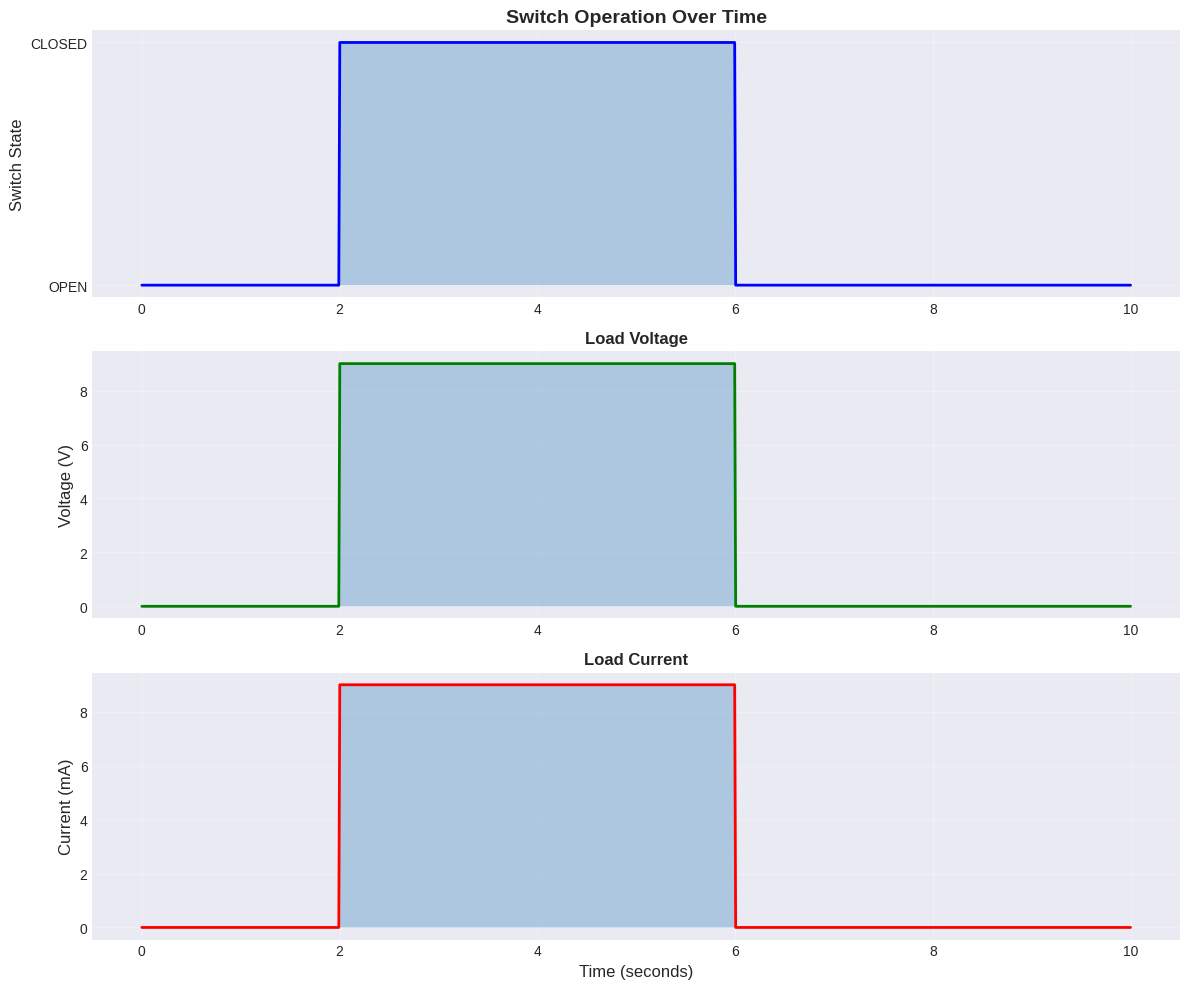

In [20]:
# Simulate switch operation
time = np.linspace(0, 10, 1000)
voltage_supply = 9  # 9V battery

# Switch closed at t=2s, open at t=6s
switch_state = np.zeros_like(time)
switch_state[(time >= 2) & (time < 6)] = 1

# Voltage at load
voltage_load = voltage_supply * switch_state

# Current through load (assuming 1kΩ resistor)
R_load = 1000
current = voltage_load / R_load * 1000  # mA

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Plot 1: Switch state
ax1.plot(time, switch_state, 'b-', linewidth=2)
ax1.fill_between(time, 0, switch_state, alpha=0.3)
ax1.set_ylabel('Switch State', fontsize=12)
ax1.set_title('Switch Operation Over Time', fontsize=14, fontweight='bold')
ax1.set_yticks([0, 1])
ax1.set_yticklabels(['OPEN', 'CLOSED'])
ax1.grid(True, alpha=0.3)

# Plot 2: Voltage at load
ax2.plot(time, voltage_load, 'g-', linewidth=2)
ax2.fill_between(time, 0, voltage_load, alpha=0.3)
ax2.set_ylabel('Voltage (V)', fontsize=12)
ax2.set_title('Load Voltage', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Plot 3: Current through load
ax3.plot(time, current, 'r-', linewidth=2)
ax3.fill_between(time, 0, current, alpha=0.3)
ax3.set_xlabel('Time (seconds)', fontsize=12)
ax3.set_ylabel('Current (mA)', fontsize=12)
ax3.set_title('Load Current', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [21]:
# Circuit breaker simulation
def simulate_breaker(max_current, load_resistance, voltage=120):
    """
    Simulate circuit breaker operation
    max_current: breaker rating in Amps
    load_resistance: load resistance in Ohms
    voltage: supply voltage in Volts
    """
    actual_current = voltage / load_resistance

    print(f"Circuit Breaker: {max_current}A rating")
    print(f"Supply Voltage: {voltage}V")
    print(f"Load Resistance: {load_resistance}Ω")
    print(f"Actual Current: {actual_current:.2f}A")

    if actual_current > max_current:
        print(f"\n⚠️ BREAKER TRIPPED! ({actual_current:.2f}A > {max_current}A)")
        print("Circuit is now OPEN - No current flow")
        return False
    else:
        print(f"\n✓ Normal operation ({actual_current:.2f}A < {max_current}A)")
        return True

print("Example 1: Normal operation")
simulate_breaker(max_current=15, load_resistance=10, voltage=120)

print("\n" + "="*50 + "\n")

print("Example 2: Overload condition")
simulate_breaker(max_current=15, load_resistance=5, voltage=120)

Example 1: Normal operation
Circuit Breaker: 15A rating
Supply Voltage: 120V
Load Resistance: 10Ω
Actual Current: 12.00A

✓ Normal operation (12.00A < 15A)


Example 2: Overload condition
Circuit Breaker: 15A rating
Supply Voltage: 120V
Load Resistance: 5Ω
Actual Current: 24.00A

⚠️ BREAKER TRIPPED! (24.00A > 15A)
Circuit is now OPEN - No current flow


False

## Practice Exercises

### Exercise 1: Ohm's Law Calculations
Calculate the missing values:
1. V = ?, I = 0.015A, R = 330Ω
2. V = 5V, I = ?, R = 1000Ω
3. V = 12V, I = 0.02A, R = ?


In [22]:
# Exercise 1 Solutions
print("Exercise 1 Solutions:\n")

print("1. Find Voltage:")
ohms_law_calculator(I=0.015, R=330)

print("\n2. Find Current:")
ohms_law_calculator(V=5, R=1000)

print("\n3. Find Resistance:")
ohms_law_calculator(V=12, I=0.02)

Exercise 1 Solutions:

1. Find Voltage:
Voltage (V) = 4.950 Volts

2. Find Current:
Current (I) = 0.005000 Amperes (5.000 mA)

3. Find Resistance:
Resistance (R) = 600.000 Ohms


{'V': 12, 'I': 0.02, 'R': 600.0}

### Exercise 2: Design an LED Circuit
Design a circuit for an LED with the following specifications:
- Supply voltage: 9V
- LED forward voltage: 2V
- LED current: 20mA

Calculate the required resistor value.

LED Circuit Design:
Supply Voltage: 9V
LED Forward Voltage: 2V
LED Current: 20.0mA

Voltage across resistor: 7V
Required Resistance: 350.0Ω

Standard resistor value: 330Ω or 350Ω


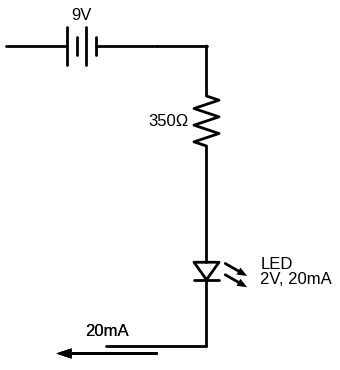

In [23]:
# Exercise 2 Solution
V_supply = 9  # V
V_led = 2  # V
I_led = 0.020  # A (20mA)

V_resistor = V_supply - V_led
R_required = V_resistor / I_led

print(f"LED Circuit Design:")
print(f"Supply Voltage: {V_supply}V")
print(f"LED Forward Voltage: {V_led}V")
print(f"LED Current: {I_led*1000}mA")
print(f"\nVoltage across resistor: {V_resistor}V")
print(f"Required Resistance: {R_required}Ω")
print(f"\nStandard resistor value: 330Ω or 350Ω")

# Draw the LED circuit
with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    d += elm.Battery().label('9V')
    d += elm.Line().right(1)
    d += elm.Resistor().down().label(f'{int(R_required)}Ω')
    d += elm.LED().down().label('LED\n2V, 20mA')
    d += elm.Line().left(2)
    d += elm.CurrentLabel().at(d.here).label('20mA')

## Summary

In this week, we covered:

✅ **Basic Circuit**: Components and connections  
✅ **Voltage and Current**: Fundamental electrical quantities  
✅ **Ohm's Law**: V = I × R  
✅ **Wire Gauge**: AWG system and current capacity  
✅ **DC Power**: Constant voltage sources  
✅ **AC Power**: Alternating voltage sources  
✅ **Voltmeter**: Measuring voltage  
✅ **Resistors**: Limiting current, color codes  
✅ **Switches and Breakers**: Controlling circuits  

### Next Week Preview:
Week 2 will cover Electric Power, Transformers, and our first lab: DC Power Supply!


# Task
Add `schemdraw` diagrams for the series resistor combination (1kΩ, 2.2kΩ, 4.7kΩ), the parallel combination of two identical resistors (1kΩ, 1kΩ), and the parallel combination of three different resistors (1kΩ, 2.2kΩ, 4.7kΩ).

## add_series_diagram

### Subtask:
Add a schemdraw diagram for the series resistor combination example.


**Reasoning**:
The user wants to visualize a series resistor combination. I will use the `schemdraw` library to draw three resistors connected in series with their specified labels.



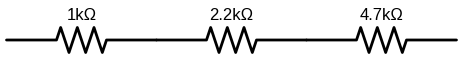

In [16]:
with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    d += elm.Resistor().label('1kΩ')
    d += elm.Resistor().label('2.2kΩ')
    d += elm.Resistor().label('4.7kΩ')
    d.draw()

## add_parallel_diagram_two_resistors

### Subtask:
Add a schemdraw diagram for the parallel combination of two identical resistors (1kΩ, 1kΩ).

#### Instructions
1. Begin a new `schemdraw` drawing context.
2. Add two resistors in parallel, each labeled '1kΩ'.

**Reasoning**:
I need to add a schemdraw diagram for two identical resistors (1kΩ, 1kΩ) connected in parallel. I will use `schemdraw` elements to draw the circuit.



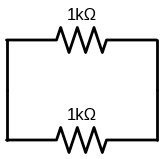

In [17]:
with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    # Start at a point and draw the first parallel branch
    d.push()
    d += elm.Line().up(1)
    d += elm.Resistor().right().label('1kΩ')
    d += elm.Line().down(1)
    d.pop()

    # Draw the second parallel branch below the first
    d += elm.Line().down(1)
    d += elm.Resistor().right().label('1kΩ')
    d += elm.Line().up(1)
    d.draw()

## add_parallel_diagram_three_resistors

### Subtask:
Add a schemdraw diagram for the parallel combination of three different resistors (1kΩ, 2.2kΩ, 4.7kΩ).

#### Instructions
1. Begin a new `schemdraw` drawing context.
2. Add three resistors in parallel, labeled '1kΩ', '2.2kΩ', and '4.7kΩ' respectively.

**Reasoning**:
I need to add a schemdraw diagram for three resistors connected in parallel with their specified labels. I will use `schemdraw` elements to draw the circuit.



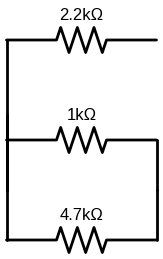

In [18]:
with schemdraw.Drawing() as d:
    d.config(fontsize=12)

    # Draw the common left wire
    d += elm.Line().up(1.5).at((0,0))

    # Draw the first parallel branch
    d.push()
    d += elm.Line().at((0,0)).up(1)
    d += elm.Resistor().right().label('1kΩ')
    d += elm.Line().down(1)
    d.pop()

    # Draw the second parallel branch
    d.push()
    d += elm.Line().at((0,0))
    d += elm.Resistor().right().label('2.2kΩ')
    d.pop()

    # Draw the third parallel branch
    d.push()
    d += elm.Line().at((0,0)).down(1)
    d += elm.Resistor().right().label('4.7kΩ')
    d += elm.Line().up(1)
    d.pop()

    # Draw the common right wire
    d += elm.Line().down(1.5)

    d.draw()

## Summary:

### Data Analysis Key Findings
*   `Schemdraw` was successfully used to generate a diagram for a series combination of three resistors (1kΩ, 2.2kΩ, 4.7kΩ).
*   A `schemdraw` diagram was successfully created for a parallel combination of two identical resistors (1kΩ, 1kΩ).
*   A `schemdraw` diagram was successfully generated for a parallel combination of three different resistors (1kΩ, 2.2kΩ, 4.7kΩ).
*   All generated diagrams were successfully displayed, as confirmed by the creation of `matplotlib` figure objects.

### Insights or Next Steps
*   The `schemdraw` library provides an effective way to visualize circuit configurations, demonstrating its capability for both simple series and more complex parallel arrangements.
*   This approach can be expanded to create more intricate circuit diagrams, potentially incorporating various electronic components and mixed series-parallel configurations for educational or design purposes.
